In [1]:

%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pymudokon as pm

jax.config.update('jax_platform_name', 'cpu')

import pandas as pd

In [2]:
# d = 1, rhop = 1, e = 0.7, mu = 0, K = 10^3, shear rate = 1
names = ["nu", "p", "s", "T", "I", "CN", "k"]
df_k3 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=2,nrows=21, names = names)
df_k4 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=26,nrows=21, names = names)
df_k5 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=50,nrows=21, names = names)
df_k6 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=74,nrows=26, names= names)
df_k7 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=103,nrows=21, names= names)
df_k8 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=127,nrows=21, names= names)

In [3]:
def df_format(df,d,K):
    df["pstar"] = df["p"]*(d/K)
    df["mu"] = df["s"]/df["p"]

    df["e"] = 1./df["nu"] -1
    return df

In [4]:
df_k3 = df_format(df_k3,d=1,K=10**3)
df_k4 = df_format(df_k4,d=1,K=10**4)
df_k5 = df_format(df_k5,d=1,K=10**5)
df_k6 = df_format(df_k6,d=1,K=10**6)
df_k7 = df_format(df_k7,d=1,K=10**7)
df_k8 = df_format(df_k8,d=1,K=10**8)

(0.5, 0.7)

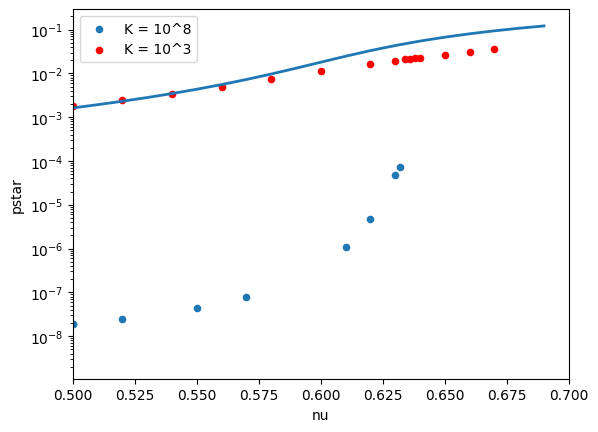

In [ ]:

fig, ax = plt.subplots()

last_volume_fraction_stack = []
last_mu_stack = []
last_p_stack = []
for phi in jnp.arange(0.5,0.7,0.01):
    carry, accumulate = pm.simple_shear_wrapper(
        pm.MuISoft,
        [
            0.12,  # mu_s 0.381.. 
            0.55, # mu_d 0.643..
            0.2, # I0
            0.634, # phi_c
            3.28, # I_phi
            1, # rho p (kg/m^3)
            1, # d (m)
            0.33, # p_phi
            # # 0.01,
            # 1.9,
            # 0.33, # p0
            0.9, # p0
            10**3 # K
        ],
        target=1.0,
        dt=1e-3,
        stress_ref= -1000.0 * jnp.eye(3).reshape(3, 3),
        # volume_fraction=0.672,
        volume_fraction=phi,
        keys=("stress", "strain_rate","volume_fraction"),
        store_every = 1,
        is_target_strain_rate= False,
        total_time=1.0,
        
    )
    
    stress_stack, strain_rate_stack,  volume_fraction_stack = accumulate
    
    volume_fraction_stack = jnp.ones(len(stress_stack))*phi
    
    pressure_stack = pm.get_pressure(stress_stack)
    
    q_stack = pm.get_q_vm(stress_stack)
    mu_stack = (q_stack/pressure_stack)/jnp.sqrt(3)
    last_mu_stack.append(
        mu_stack[-1]
    )
    
    last_volume_fraction_stack.append(
        volume_fraction_stack[-1]
    )
    p_stack = pm.get_pressure(stress_stack)
    last_p_stack.append(
        p_stack[-1]
    )
    # ax.scatter(volume_fraction_stack,mu_stack,label=f"volume fraction = {phi}")


ax.plot(jnp.array(last_volume_fraction_stack),jnp.array(last_p_stack)/10**3, ls="-",lw=2, label="Jop")

df_k8.plot(y="pstar", x="nu", kind="scatter", ax = ax, label="K = 10^8")
df_k3.plot(y="pstar", x="nu", kind="scatter", ax=ax,c="r", label="K = 10^3")

ax.set_yscale("log")
ax.set_xlim(0.5,0.7)


(0.0, 0.6)

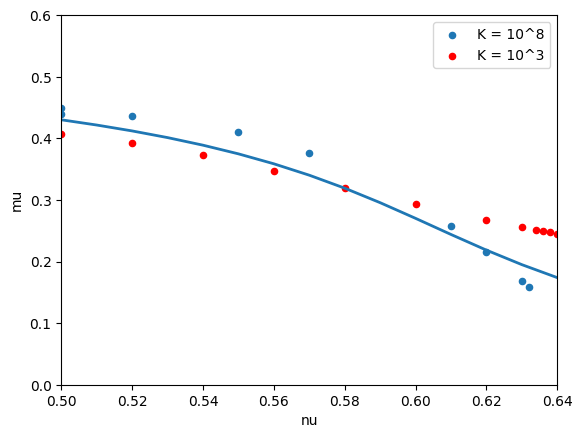

In [6]:
fig, ax = plt.subplots()

ax.plot(jnp.array(last_volume_fraction_stack),jnp.array(last_mu_stack), ls="-",lw=2, label="Jop")

df_k8.plot(y="mu", x="nu", kind="scatter", ax = ax, label="K = 10^8")
df_k3.plot(y="mu", x="nu", kind="scatter", ax=ax,c="r", label="K = 10^3")

# ax.set_yscale("log")
ax.set_xlim(0.5,0.64)
ax.set_ylim(0,0.6)

In [7]:
last_mu_stack[0], last_p_stack[0]

(Array(0.43008798, dtype=float32), Array(1.6280087, dtype=float32))

In [8]:
pstar =  last_p_stack[0]*(1/10**3)
last_mu_stack[0]*(1 - (pstar/0.9)**0.5)

Array(0.41179585, dtype=float32)

In [9]:

# carry, accumulate = pm.simple_shear_wrapper(
#     pm.MuISoft,
#     [
#         0.12,  # mu_s 0.381..
#         0.55, # mu_d 0.643..
#         0.2, # I0
#         0.634, # phi_c
#         3.28, # I_phi
#         2000, # rho p (kg/m^3)
#         0.0053, # d (m)
#         0.33, # p_phi
#         0.9 # p0
#     ],
#     target=1.0,
#     target_start=0.8,
#     dt=1e-3,
#     stress_ref= -1000.0 * jnp.eye(3).reshape(3, 3),
#     volume_fraction=0.672,
#     keys=("stress", "strain_rate","volume_fraction"),
#     store_every = 1,
#     is_target_strain_rate= True,
#     total_time=1.0,
    
# )

# stress_stack, strain_rate_stack,  volume_fraction_stack = accumulate

# fig_ax_stack = pm.plot_suite(
#     "./output/mu_I_ss_",
#     strain_rate_stack,
#     stress_stack,
#     volume_fraction_stack,
#     dt = 1e-3
#     )


In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(p_stack,q_stack)


In [ ]:
# mu_stack.min(),mu_stack.max()

In [ ]:
# I_stack.min(),I_stack.max()

In [ ]:


    # ax.plot(volume_fraction_stack,pressure_stack,label=f"volume fraction = {phi}")


In [ ]:
# # import partial
# # import vmap

# # @partial(jax.vmap, in_axes=(0, 0, None, None), out_axes=(0))
# # def get_I(shear_strain_rate, p, d0,rho_p):
    
    
# #     volumetric_strain_rate = -jnp.trace(shear_strain_rate)  # compressive strain rate is positive

# #     deviatoric_strain_rate = shear_strain_rate + (1 / 3.0) * volumetric_strain_rate * jnp.eye(3)

# #     dgamma_dt = jnp.sqrt(0.5 * (deviatoric_strain_rate @ deviatoric_strain_rate.T).trace())
    


# def get_I(stress_stack, strain_rate_stack,d,rho_p):
    
#     p_stack = pm.get_pressure(stress_stack)
#     dgamma_dt = pm.get_gamma(strain_rate_stack)
#     print(p_stack.shape)
#     vmap_get_I = jax.vmap(lambda dgamma_dt,p: (dgamma_dt*d)/jnp.sqrt(p/rho_p), in_axes=(0,0))
#     return vmap_get_I(dgamma_dt,p_stack)

# I_stack = get_I(stress_stack, strain_rate_stack, 0.0053, 2000)

# q_stack = pm.get_q_vm(stress_stack)

# p_stack = pm.get_pressure(stress_stack)


# mu_stack = (q_stack/p_stack)/jnp.sqrt(3)